# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
-0.002
-0.003
-0.002
-0.003
-0.002
-0.002
-0.002
0.992
0.992
0.991
0.99
1.999
1.999
1.998
1.998
3.004
3.005
3.004
4.008
4.01
4.011
4.011
4.011
5.02
5.019
5.018
5.018
6.026
6.026
6.024
6.024
6.893
6.893
6.892
6.892
7.758
7.758
7.756
7.756
8.758
8.761
8.764
8.764
8.764
9.763
9.766
9.768
9.766
9.766
10.769
10.772
10.774
10.773
10.773
11.779
11.778
11.778
11.778
12.776
12.779
12.781
12.781
12.781
13.782
13.785
13.787
13.787
13.786
14.734
14.738
14.739
14.735
15.692
15.691
15.69
15.69
16.695
16.695
16.694
16.693
17.701
17.7
18.705
18.705
18.703
18.703
19.706
19.706
19.706
19.706
20.711
20.711
20.71
20.71
21.708
21.708
21.707
21.707
22.525
22.524
22.523
22.523
23.339
23.339
23.337
23.337
24.349
24.349
24.348
24.347
25.335
25.335
25.333
25.333
26.325
26.325
26.324
26.324
27.311
27.311
27.31
27.31
28.299
28.299
28.295
28.298
29.285
29.286
29.286
29.286
29.794
29.794
29.

58.321
58.321
58.319
58.322
58.5
58.5
58.552
58.552
58.554
58.555
58.554
58.553
58.553
58.973
58.974
59.01
59.01
59.011
59.012
59.01
59.009
59.009
59.01
59.4
59.43
59.43
59.43
59.432
59.431
59.43
59.43
59.432
59.917
59.917
59.947
59.949
59.949
59.951
59.952
59.951
59.951
59.95
59.95
59.949
59.948
59.948
59.949
59.951
59.951
59.951
59.95
59.95
59.95
59.95
59.95
59.95
59.95
59.951
59.95
59.95
59.95
59.949
59.949
59.949
59.949
59.949
59.948
59.948
59.947
59.947
59.947
59.946
59.946
59.946
59.946
59.946
59.946
59.946
59.946
59.946
59.946
59.946
59.939
59.942
59.944
59.947
59.946
59.945
59.945
59.944


KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1291,2582,59.947
1292,2584,59.946
1293,2586,59.945
1294,2588,59.945


<IPython.core.display.Javascript object>


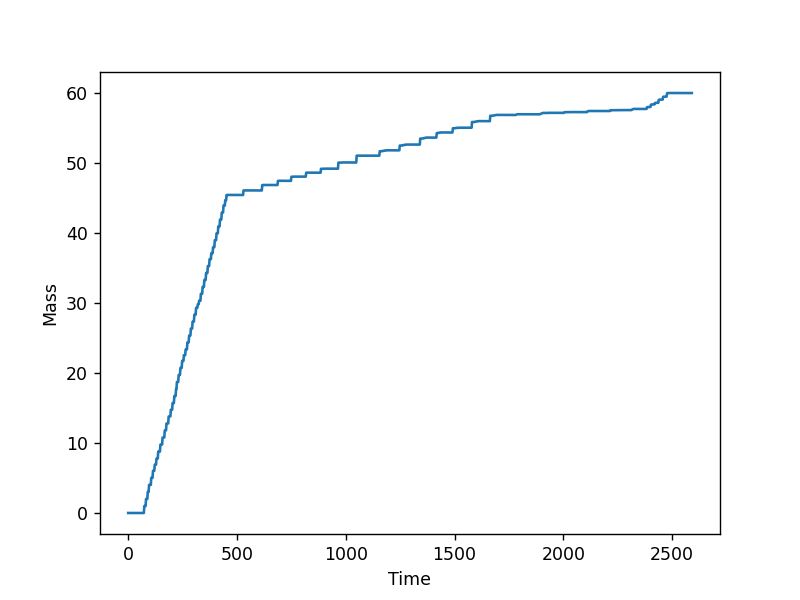

In [8]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [9]:
mass_df.to_csv('mass_data/MassProfile_100123_S43-48.csv')